In [3]:
import pandas as pd
import numpy as np

# Pvlib 라이브러리를 이용해서 태양고도, 일사량 가져오기

### 태양고도

In [ ]:
# 위 라이브러리는 한국천문연구원 태양고도 데이터와 동일하다.

In [4]:
import pvlib

naive_times = pd.date_range(start='2019', end='2021-07-25', freq='1h')
timezone = 'Asia/Seoul'
times = naive_times.tz_localize(timezone)
solpos = pvlib.solarposition.get_solarposition(times, 36.8156, 127.0572) # 위, 경도 입력
pd.set_option("display.max_rows", 10)
solpos=solpos.iloc[:,[3]]
solpos.reset_index(inplace=True)
solpos["index"]= solpos["index"].dt.strftime('%Y-%m-%d %H:%M:%S')
solpos["index"] = pd.to_datetime(solpos["index"])
solpos.set_index("index",inplace=True)
solpos

,elevation
index,
2019-01-01 00:00:00,-74.340661
2019-01-01 01:00:00,-75.216499
2019-01-01 02:00:00,-67.080480
2019-01-01 03:00:00,-55.941722
2019-01-01 04:00:00,-44.062590
...,...
2021-07-24 20:00:00,-3.459100
2021-07-24 21:00:00,-13.545816
2021-07-24 22:00:00,-22.232407


### 일사량

In [9]:
from pvlib.location import Location
tus = Location(36.8156, 127.0572, 'Asia/Seoul') # 위, 경도 입력
irr=tus.get_clearsky(times)
pd.set_option("display.max_rows", 10)
irr.reset_index(inplace=True)
irr["index"]= irr["index"].dt.strftime('%Y-%m-%d %H:%M:%S')
irr["index"] = pd.to_datetime(irr["index"])
irr.set_index("index",inplace=True)
irr

,ghi,dni,dhi
index,,,
2019-01-01 00:00:00,0.0,0.0,0.0
2019-01-01 01:00:00,0.0,0.0,0.0
2019-01-01 02:00:00,0.0,0.0,0.0
2019-01-01 03:00:00,0.0,0.0,0.0
2019-01-01 04:00:00,0.0,0.0,0.0
...,...,...,...
2021-07-24 20:00:00,0.0,0.0,0.0
2021-07-24 21:00:00,0.0,0.0,0.0
2021-07-24 22:00:00,0.0,0.0,0.0


<AxesSubplot:xlabel='index'>

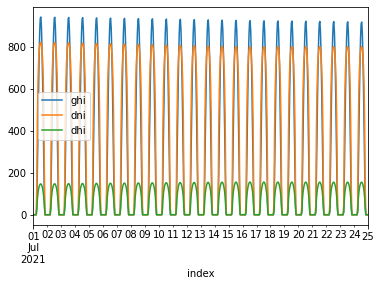

In [13]:
irr["2021-07"].plot()

<AxesSubplot:xlabel='index'>

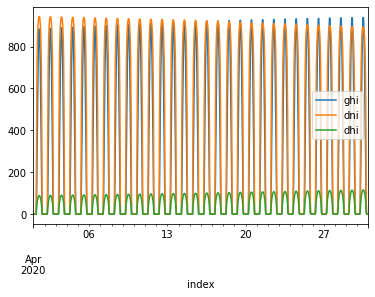

In [12]:
irr["2020-04"].plot()